In [178]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
#make sure to install sklearn in your terminal first!
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [179]:
jobs = pd.read_csv('https://raw.githubusercontent.com/DG1606/CMS-R-2020/master/Placement_Data_Full_Class.csv')

college = pd.read_csv('../data/cc_institution_details.csv')


# For Placement Data Q1:
#### Can we predict salary based on undergrad and postgrad degree type?

## Steps
1. Load in all the data
2. Clean data to remove any missing values
3. Categorize degrees into their top specializations
4. standardize salary data
5. Calculate prevalence
6. Calculate test, train, and tune
7. Create a function to combine all cleaning and categorization steps
8. Create a function to determine correlation between various variables and salary
   

In [180]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [181]:
top = ['Sci&Tech','Comm&Mgmt']
jobs.degree_t = (jobs.degree_t.apply(lambda x: x if x in top else "Other")).astype('category')
jobs.degree_t.value_counts()

degree_t
Comm&Mgmt    145
Sci&Tech      59
Other         11
Name: count, dtype: int64

In [182]:
t2 = ['Mkt&Fin','Mkt&HR']
jobs.specialisation = (jobs.specialisation.apply(lambda x: x if x in t2 else "Other")).astype('category')
jobs.specialisation.value_counts()

specialisation
Mkt&Fin    120
Mkt&HR      95
Name: count, dtype: int64

In [183]:
salary_sc = StandardScaler().fit_transform(jobs[['salary']].dropna())
salary_sc[:10]

array([[-0.2002917 ],
       [-0.95183895],
       [-0.41501948],
       [ 1.46384865],
       [-0.3935467 ],
       [-0.61901088],
       [-0.30765559],
       [-0.41501948],
       [-0.75858394],
       [-0.95183895]])

<Axes: ylabel='Density'>

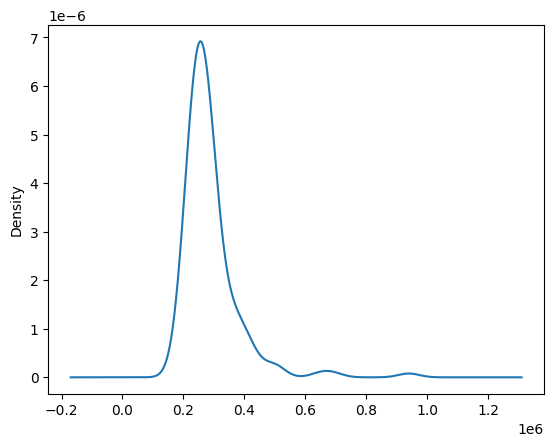

In [184]:
jobs.salary.plot.density()

In [185]:
abc = list(jobs.select_dtypes('number')) #select function to find the numeric variables and create a list  

jobs[abc] = MinMaxScaler().fit_transform(jobs[abc])

In [186]:
category_list = list(jobs.select_dtypes('category')) #select function to find the categorical variables and create a list  

jobs_1h = pd.get_dummies(jobs, columns = category_list) 
jobs_1h

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,workex,etest_p,mba_p,status,salary,degree_t_Comm&Mgmt,degree_t_Other,degree_t_Sci&Tech,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,0.000000,M,0.538240,Others,0.889621,Others,Commerce,0.195122,No,0.104167,0.284483,Placed,0.094595,False,False,True,False,True
1,0.004673,M,0.792414,Central,0.680890,Others,Science,0.670244,Yes,0.760417,0.564843,Placed,0.000000,False,False,True,True,False
2,0.009346,M,0.497011,Central,0.510708,Central,Arts,0.341463,No,0.520833,0.247001,Placed,0.067568,True,False,False,True,False
3,0.014019,M,0.311482,Central,0.247117,Central,Science,0.048780,No,0.333333,0.308096,Not Placed,NaN,False,False,True,False,True
4,0.018692,M,0.925788,Central,0.602965,Central,Commerce,0.568293,No,0.975000,0.160795,Placed,0.304054,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0.981308,M,0.818594,Others,0.741351,Others,Commerce,0.673171,No,0.854167,0.872564,Placed,0.270270,True,False,False,True,False
211,0.985981,M,0.352711,Others,0.378913,Others,Science,0.536585,No,0.500000,0.090330,Placed,0.101351,False,False,True,True,False
212,0.990654,M,0.538240,Others,0.494234,Others,Commerce,0.560976,Yes,0.187500,0.693778,Placed,0.128378,True,False,False,True,False
213,0.995327,F,0.682540,Others,0.477759,Others,Commerce,0.195122,No,0.416667,0.338081,Placed,0.005405,True,False,False,False,True


count    148.000000
mean       0.119805
std        0.126294
min        0.000000
25%        0.054054
50%        0.087838
75%        0.135135
max        1.000000
Name: salary, dtype: float64

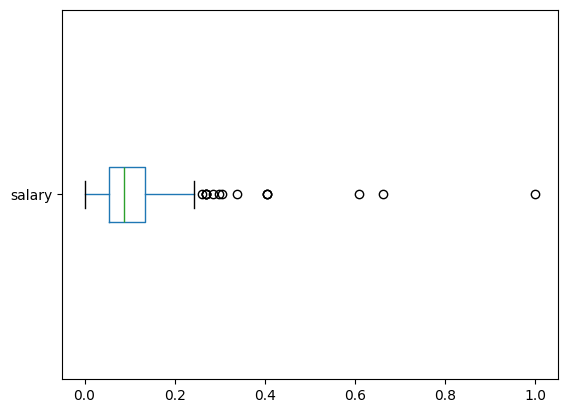

In [187]:
jobs_1h.boxplot(column= 'salary', vert= False, grid=False)
jobs_1h.salary.describe()

In [188]:
jobs_1h['salary_f'] = pd.cut(jobs_1h.salary, bins = [-1, 0.13, 1], labels=[0,1])

In [189]:
prevalence = jobs_1h.salary_f.value_counts()[1]/len(jobs_1h.salary_f)
prevalence

np.float64(0.23255813953488372)

In [190]:
# Drop rows with NaN values in the salary_f column
jobs_1h_clean = jobs_1h.dropna(subset=['salary_f'])
jobs_1h_clean = jobs_1h_clean.drop(['ssc_b', 'hsc_b'], axis=1)
# Perform train-test split
Train, Test = train_test_split(jobs_1h_clean, train_size=0.55, stratify=jobs_1h_clean.salary_f)

In [191]:
Tune, Test = train_test_split(Test,  train_size = .5, stratify= Test.salary_f)

In [192]:
def pre_process_jobs(url):
    jobs = pd.read_csv(url)

    top = ['Sci&Tech','Comm&Mgmt']
    jobs.degree_t = (jobs.degree_t.apply(lambda x: x if x in top else "Other")).astype('category')

    t2 = ['Mkt&Fin','Mkt&HR']
    jobs.specialisation = (jobs.specialisation.apply(lambda x: x if x in t2 else "Other")).astype('category')

    abc = ['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']
    jobs[abc] = MinMaxScaler().fit_transform(jobs[abc])

    category_list = ['degree_t', 'specialisation']
    jobs_1h = pd.get_dummies(jobs, columns = category_list) 

    jobs_1h['salary_f'] = pd.cut(jobs_1h.salary, bins = [-1, 0.13, 1], labels=[0,1])

    jobs_1h_clean = jobs_1h.dropna(subset=['salary_f'])
    jobs_1h_clean = jobs_1h_clean.drop(['ssc_b', 'hsc_b'], axis=1)

    prevalence = jobs_1h_clean.salary_f.value_counts()[1] / len(jobs_1h_clean.salary_f)

    Train, Test = train_test_split(jobs_1h_clean, train_size=0.55, stratify=jobs_1h_clean.salary_f)

    Tune, Test = train_test_split(Test,  train_size = .5, stratify= Test.salary_f)

    return Train, Tune, Test, prevalence

pre_process_jobs('https://raw.githubusercontent.com/DG1606/CMS-R-2020/master/Placement_Data_Full_Class.csv')


(        sl_no gender     ssc_p     hsc_p     hsc_s  degree_p workex   etest_p  \
 127  0.593458      F  0.641311  0.378913   Science  0.463415     No  0.114583   
 50   0.233645      F  0.707277  0.596376   Science  0.448780     No  0.312500   
 205  0.957944      M  0.414554  0.411862  Commerce  0.365854     No  0.250000   
 70   0.327103      M  0.847454  0.395387   Science  0.292683     No  0.812500   
 33   0.154206      F  0.950526  0.461285   Science  0.756098    Yes  0.791667   
 ..        ...    ...       ...       ...       ...       ...    ...       ...   
 145  0.677570      M  1.000000  0.472158   Science  0.518293     No  0.458333   
 176  0.822430      F  0.373325  0.378913  Commerce  0.146341     No  0.104167   
 163  0.761682      M  0.455782  0.494234   Science  0.341463     No  0.520833   
 56   0.261682      M  0.455782  0.566722  Commerce  0.278049     No  0.375000   
 156  0.728972      M  0.892806  0.533773   Science  0.365854    Yes  0.625000   
 
         mba_p

# Results:
My instincts tell me that degree type will have a large impact on salary later in life, I believe that certain undergrad and postgrad degrees related to business are more likely to result in higher salaries. I believe that testing a model checking this question could answer my problem. My biggest concern is that the missing salary data will have an influence on the model and skew the results that does not actually represent the data. 

## For College Institution Data Q2:

#### Can we predict aid value based on endowment value?

## Steps
1. Load in all the data
2. Clean data to remove any missing values
3. Standardize aid value data
4. Calculate prevalence
5. Calculate test, train, and tune
6. Create a function to combine all cleaning and categorization steps
7. Create a function to determine correlation between endowment and aid value

In [193]:
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 63 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   index                                 3798 non-null   int64  
 1   unitid                                3798 non-null   int64  
 2   chronname                             3798 non-null   object 
 3   city                                  3798 non-null   object 
 4   state                                 3798 non-null   object 
 5   level                                 3798 non-null   object 
 6   control                               3798 non-null   object 
 7   basic                                 3798 non-null   object 
 8   hbcu                                  94 non-null     object 
 9   flagship                              50 non-null     object 
 10  long_x                                3798 non-null   float64
 11  lat_y            

In [194]:
c = list(college.select_dtypes('number')) #select function to find the numeric variables and create a list  

college[c] = MinMaxScaler().fit_transform(college[c])

In [195]:
category1 = list(college.select_dtypes(include=['object', 'category'])) #select function to find the categorical variables and create a list  

college_1h = pd.get_dummies(college, columns = category1) 
college_1h

,index,unitid,long_x,lat_y,student_count,awards_per_value,awards_per_state_value,awards_per_natl_value,exp_award_value,exp_award_state_value,...,nicknames_WIU,nicknames_WKU,nicknames_WMU,nicknames_WPI,nicknames_WSU,nicknames_WTAMU,nicknames_WVU,nicknames_Wash U|WUSTL,nicknames_XULA,nicknames_YSU
0,0.000000,0.000000,0.790292,0.292177,0.023677,0.099927,0.275132,0.306748,0.019941,0.359141,...,False,False,False,False,False,False,False,False,False,False
1,0.000263,0.000024,0.787680,0.267361,0.067476,0.148796,0.275132,0.306748,0.025851,0.359141,...,False,False,False,False,False,False,False,False,False,False
2,0.000527,0.000096,0.794572,0.245286,0.001758,0.214442,0.257496,0.368098,0.011059,0.452754,...,False,False,False,False,False,False,False,False,False,False
3,0.000790,0.000139,0.789533,0.291004,0.033347,0.148796,0.275132,0.306748,0.012196,0.359141,...,False,False,False,False,False,False,False,False,False,False
4,0.001053,0.000187,0.793252,0.245319,0.031348,0.080963,0.275132,0.306748,0.025067,0.359141,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3793,0.998947,0.963263,0.872837,0.297512,0.000511,0.187454,0.320988,0.368098,0.004553,0.770853,...,False,False,False,False,False,False,False,False,False,False
3794,0.999210,0.965468,0.459168,0.259974,0.000688,0.117433,0.338624,0.368098,0.020061,0.643289,...,False,False,False,False,False,False,False,False,False,False
3795,0.999473,0.977658,0.748321,0.368084,0.002733,0.398249,0.507937,0.496933,0.010022,0.087195,...,False,False,False,False,False,False,False,False,False,False
3796,0.999737,0.998906,0.716903,0.487486,0.000729,0.235594,0.613757,1.000000,0.014172,0.081649,...,False,False,False,False,False,False,False,False,False,False


count    3797.000000
mean        0.185691
std         0.155492
min         0.000000
25%         0.090200
50%         0.118999
75%         0.219178
max         1.000000
Name: aid_value, dtype: float64

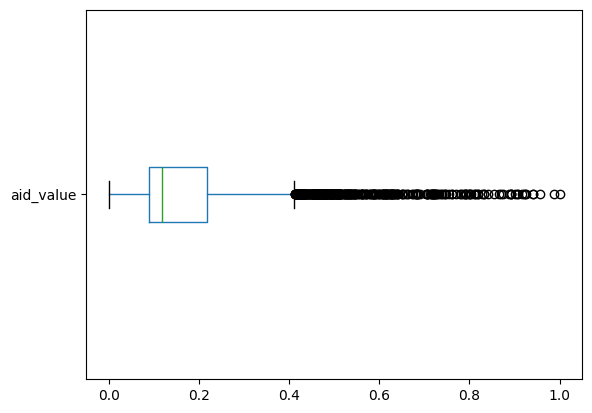

In [196]:
college_1h.boxplot(column= 'aid_value', vert= False, grid=False)
college_1h.aid_value.describe()

In [197]:
college_1h['aid_f'] = pd.cut(college_1h.aid_value, bins = [-1, 0.21, 1], labels=[0,1])

In [198]:
prevalence = college_1h.aid_f.value_counts()[1]/len(college_1h.aid_f)

prevalence 

np.float64(0.25961032122169564)

In [199]:
print(college_1h.aid_f.value_counts())
print(330/(3467+330))

aid_f
0    2811
1     986
Name: count, dtype: int64
0.08691071898867526


In [200]:
# Drop unnecessary columns from college_1h
college_1 = college_1h.drop(['index', 'unitid', 'long_x', 'lat_y', 'vsa_year', 'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first', 'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first', 'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first', 'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first', 'vsa_grad_after4_transfer', 'vsa_grad_elsewhere_after4_transfer', 'vsa_enroll_after4_transfer', 'vsa_enroll_elsewhere_after4_transfer', 'vsa_grad_after6_transfer', 'vsa_grad_elsewhere_after6_transfer', 'vsa_enroll_after6_transfer', 'vsa_enroll_elsewhere_after6_transfer'], axis=1)


In [201]:
college_1 = college_1.dropna(subset=['aid_f'])

# Perform train-test split
Train, Test = train_test_split(college_1, train_size=0.55, stratify=college_1.aid_f)

In [202]:
print(Train.shape)
print(Test.shape)

(2088, 14218)
(1709, 14218)


In [203]:
Tune, Test = train_test_split(Test,  train_size = .5, stratify= Test.aid_f)

In [206]:
print(Train.aid_f.value_counts())
print(542/(1546+542))

print(Tune.aid_f.value_counts())
print(222/(632+222))

aid_f
0    1546
1     542
Name: count, dtype: int64
0.2595785440613027
aid_f
0    632
1    222
Name: count, dtype: int64
0.25995316159250587


In [205]:
def pre_process_college(url):
    college = pd.read_csv(url)

    c = list(college.select_dtypes(include=['number']))    

    college[c] = MinMaxScaler().fit_transform(college[c])

    category1 = list(college.select_dtypes(include=['object', 'category']))
    college_1h = pd.get_dummies(college, columns = category1) 

    college_1h['aid_f'] = pd.cut(college_1h.aid_value, bins = [-1, 0.21, 1], labels=[0,1])

    college_1 = college_1h.drop(['index', 'unitid', 'long_x', 'lat_y', 'vsa_year', 'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first', 'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first', 'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first', 'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first', 'vsa_grad_after4_transfer', 'vsa_grad_elsewhere_after4_transfer', 'vsa_enroll_after4_transfer', 'vsa_enroll_elsewhere_after4_transfer', 'vsa_grad_after6_transfer', 'vsa_grad_elsewhere_after6_transfer', 'vsa_enroll_after6_transfer', 'vsa_enroll_elsewhere_after6_transfer'], axis=1)

    college_1 = college_1.dropna(subset=['aid_f'])

    prevalence = college_1.aid_f.value_counts()[1] / len(college_1.aid_f)

    Train, Test = train_test_split(college_1, train_size=0.55, stratify=college_1.aid_f)

    Tune, Test = train_test_split(Test,  train_size = .5, stratify= Test.aid_f)

    return Train, Tune, Test, prevalence

pre_process_college('../data/cc_institution_details.csv')
    

(      student_count  awards_per_value  awards_per_state_value  \
 2546       0.022143          0.138585                0.238095   
 2840       0.018763          0.180160                0.285714   
 2884       0.038731          0.130562                0.305115   
 1145       0.002469          0.140773                0.338624   
 2014       0.018487          0.197666                0.400353   
 ...             ...               ...                     ...   
 2672       0.004961          0.455142                0.562610   
 705        0.033388          0.175055                0.370370   
 2283       0.012209          0.166302                0.335097   
 2677       0.006989          0.139314                0.354497   
 25         0.050076          0.111597                0.223986   
 
       awards_per_natl_value  exp_award_value  exp_award_state_value  \
 2546               0.000000         0.004041               0.121343   
 2840               0.368098         0.026616               0.

#### Results Q2:
 
My instincts tell me that endowment value will be hard to determine the exact influence on aid value. While it does seem like an interesting problem to pose as it would be ideal if institutions with greater funds are able to give more aid but I am not sure if that is what the data will project. With such a wide range of aid, it seems like it will be difficult to present the relationship. I am worried about the overwhelming amount of data that is spread out in a larger range for the aid value making it difficult to determine relationships between endowment or any other variable.